In [166]:
!pip install catboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Heart Attack Analysis and Prediction

This problem was about prediction whether a person more likely has a higher chance to get heart attack or no.

This problem mainly a **Classification** task. Therefore, I will try to use Machine Learning model to classify this dataset for prediction.

The evaluation that will be used for future is mainly on **F1-Score** where other metrics such as **Accuracy, Precision, Recall, or AUC** can also be the metrics but not as our main focus.

#### Acknowledge
This dataset was taken from kaggle [Heart Attack Analysis and Prediction](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

## Importing Libraries

In [167]:
# Visualization, Linear Algebra, and Dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Feature Importance
import shap

## Loading Dataset

In [168]:
data = pd.read_csv('https://raw.githubusercontent.com/DnYAlv/Heart_Attack_Prediction/main/Dataset/heart.csv')

## Data Understanding

Based on kaggle, there are information about the variables used on this dataset such as:

| Variable | Description |
|----------| ------------|
| Age | Age of the patient |
| Sex | Sex of the patient |
| exang | exercise induced angina (1 = yes, 0 = no) |
| caa | number of major vessels (0-3)|
| cp | Chest Pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) | 
| trtbps | resting blood pressure (in mm Hg) |
| chol | Cholestrol in mg/dl fetched via BMI sensor |
| oldpeak | Previous Peak |
| slp | Slope |
| thall | Thal rate |
| fbs | (fasting blood sugar > 120 mg/dl) (1 = true, 0 = false) |
| rest_ecg | resting electrocardiographic result (0 = Normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,|
|| 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) | 
| thalach | maximum heart rate achieved |
| target (output) | 0 = less chance of heart attack, 1 = more chance of heart attack |

## Exploring Data

In [169]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [170]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Wrangling
In this process, our main task focused on:
- Missing Values
- Duplicate Data

This process helps us to analyze our dataset better

### Missing Values

In [172]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

> As we can see, our dataset seems to be clear of missing values, therefore this dataset is good to go

### Duplicate Data

In [173]:
duplicate = data[data.duplicated()]

In [174]:
duplicate

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


> Seems like this dataset contain 1 duplicate data, let's remove this.

In [175]:
data.drop_duplicates(inplace=True)

### Resetting Index
Dropping rows may not return the index as we want, so let's reset the index

In [176]:
data = data.reset_index(drop=True)

## Exploratory Data Analysis

In [177]:
print(f'There are {data.shape[0]} records and {data.shape[1]} columns on this dataset.')

There are 302 records and 14 columns on this dataset.


### Target

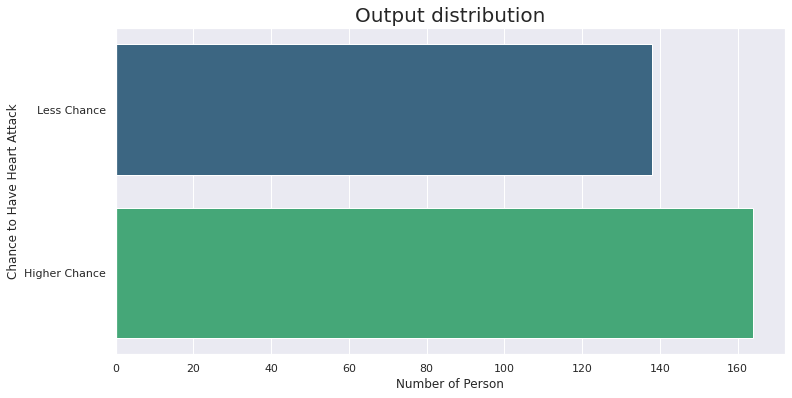

In [178]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
ax = sns.countplot(y = 'output', data=data, palette='viridis')
ax.set_yticklabels(['Less Chance','Higher Chance'])
plt.ylabel('Chance to Have Heart Attack')
plt.xlabel('Number of Person')
plt.title('Output distribution', fontsize=20, loc = 'center')
plt.show()

> The output distribution is more likely to be a balanced dataset, which means good, we don't need to be aware of *overfitting* or *biased* problem which commonly happens on **Imbalance dataset**

### Age

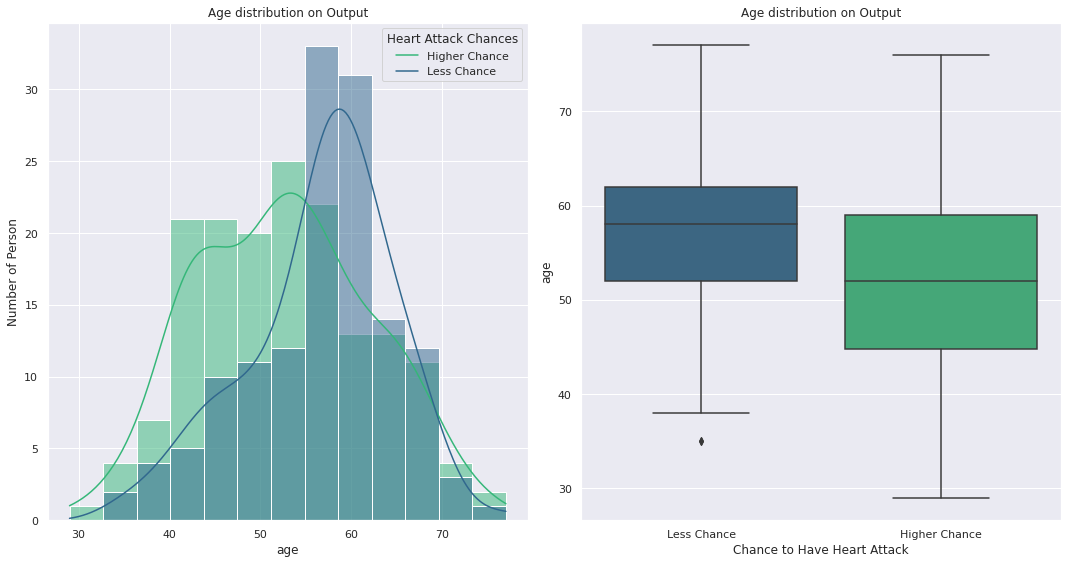

In [179]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

sns.histplot(x='age', data=data, kde=True, hue='output',
             ax=ax[0], palette = 'viridis')
ax[0].set_title('Age distribution on Output')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('age')
ax[0].legend(title='Heart Attack Chances',
             labels=['Higher Chance','Less Chance'],
             loc='upper right')

sns.boxplot(x='output', data=data, y='age', ax=ax[1], palette = 'viridis')
ax[1].set_title('Age distribution on Output')
ax[1].set_xticklabels(['Less Chance','Higher Chance'])
ax[1].set_xlabel('Chance to Have Heart Attack')

plt.tight_layout()
plt.show()

> The distribution of age variable is more likely normal (Even though have a little bit skew distribution). As we can see, people with age between 50 - 60 mostly have lower chance of getting heart attack and people with age between 40 - 50 mostly have higher chance of getting heart attack.

### Sex
- From the given dataset, `Sex` is divided into two categories, 1 and 0, since we were not given any information about which one is male or female, we can leave it as it is

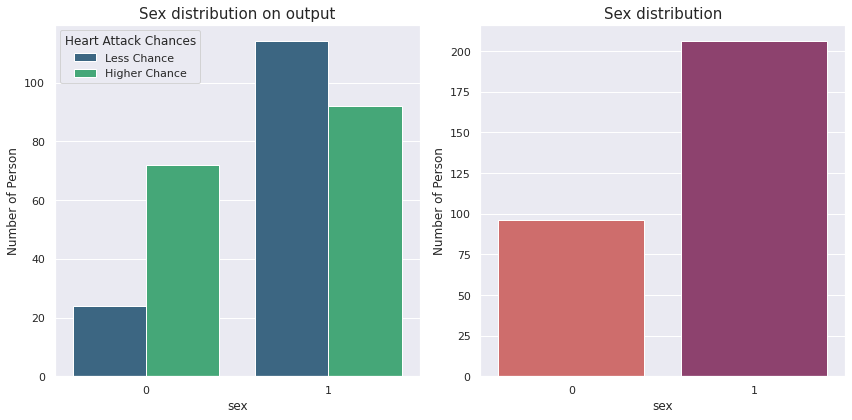

In [180]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(x='sex', data=data, hue='output', palette='viridis', ax=ax[0])
ax[0].set_title('Sex distribution on output', fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper left')
ax[0].set_ylabel('Number of Person')

sns.countplot(x='sex', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Sex distribution', fontsize=15)
ax[1].set_ylabel('Number of Person')
plt.tight_layout()
plt.show()

> Seems like `Sex` with category of `1` dominate this dataset. But, as we can see from its relation towards `Output` (whether a person has higher or lower chance of getting heart attack), we can see two things:
- `Sex = 1` is mostly has higher distribution where people has higher chance of getting heart attack than `Sex = 0`
- There are more distribution of people with `Sex = 0` has higher chance of getting heart attack. In the other hand, There are more distribution of people with `Sex = 1` has lesser chance of getting heart attack

### Chest Pain Type
From given information, the information of this `Chest Pain Type` is categorized from 1 to 4. However, the dataset itself shows category from 0 to 3, we will then assume that this is some mistyping (indexing problem). Therefore, we will use the category from 0 to 3

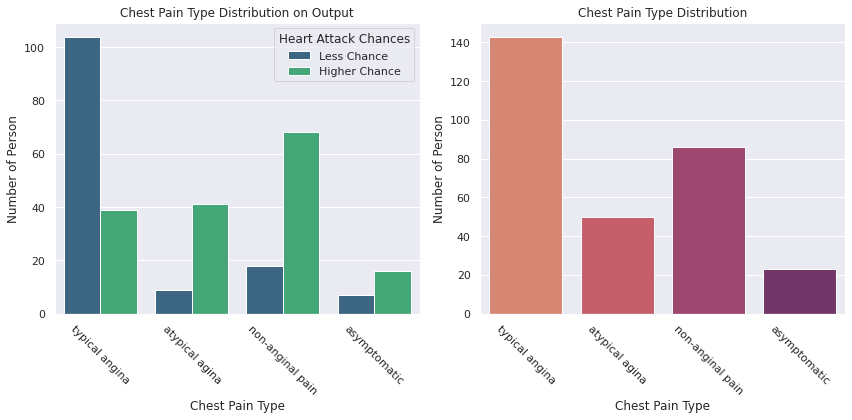

In [181]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(x='cp', data=data, hue='output', palette='viridis', ax=ax[0])
ax[0].set_title('Chest Pain Type Distribution on Output')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Chest Pain Type')
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper right')
ax[0].set_xticklabels(['typical angina', 'atypical agina',
                       'non-anginal pain','asymptomatic'],
                      rotation=-45)

sns.countplot(x='cp', data=data, ax=ax[1], palette='flare')
ax[1].set_title('Chest Pain Type Distribution')
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Chest Pain Type')
ax[1].set_xticklabels(['typical angina', 'atypical agina',
                       'non-anginal pain','asymptomatic'],
                      rotation=-45)
plt.tight_layout()
plt.show()

> There are several information that we can get from here:
- This dataset contains a lot of people with `typical angina chest pain type`. However, the distribution of people with `typical angina` mostly have lower chance of getting heart attack
- People with `non-anginal pain` chest pain type (second most distribution) have a distribution of people where mostly have higher chance of getting heart attack
- `atypical angina, non-anginal pain, asymptomatic` have a distribution of people where mostly of people have higher chance of getting heart attack.
- This variable has a big difference of output distribution on each category, it indicates that this variable is rather related with `Output`. Therefore, Chest Pain Type can be one of factor to see whether a person might have higher or less chance on getting heart attack.

### Resting Blood Pressure (in mm Hg)

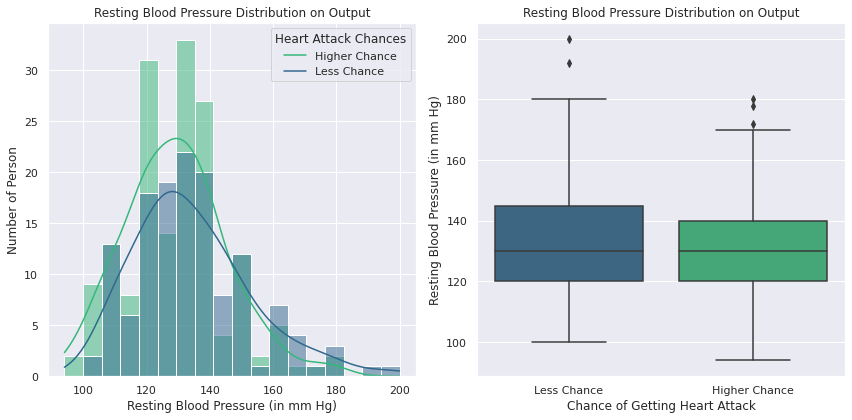

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(x = 'trtbps',
             data = data,
             hue = 'output',
             palette = 'viridis',
             kde = True,
             ax = ax[0])
ax[0].set_title('Resting Blood Pressure Distribution on Output')
ax[0].set_xlabel('Resting Blood Pressure (in mm Hg)')
ax[0].set_ylabel('Number of Person')
ax[0].legend(title='Heart Attack Chances',
          labels=['Higher Chance','Less Chance'],
          loc='upper right')

sns.boxplot(x = 'output', data = data,
            y = 'trtbps', palette = 'viridis',
            ax = ax[1])
ax[1].set_title('Resting Blood Pressure Distribution on Output')
ax[1].set_ylabel('Resting Blood Pressure (in mm Hg)')
ax[1].set_xticklabels(['Less Chance', 'Higher Chance'])
ax[1].set_xlabel('Chance of Getting Heart Attack')

plt.tight_layout()
plt.show()

> From here, we can have several information as such:
- The distribution of `Resting Blood Pressure (trtbps)` is slightly right skewed. This skewed visually clear on `Boxplot` where there are some people that have a high resting blood pressure. We know that resting blood pressure of each person is different, and in some cases there may some people that have higher resting blood pressure than other people
- `Resting Blood Pressure` distribution has a similar distribution for both people that have higher and lower chance of getting heart attack, this indicates that `Resting Blood Pressure` doesn't really affects whether a person have higher or lower chance of getting heart attack.

### Cholestrol in mg/dl

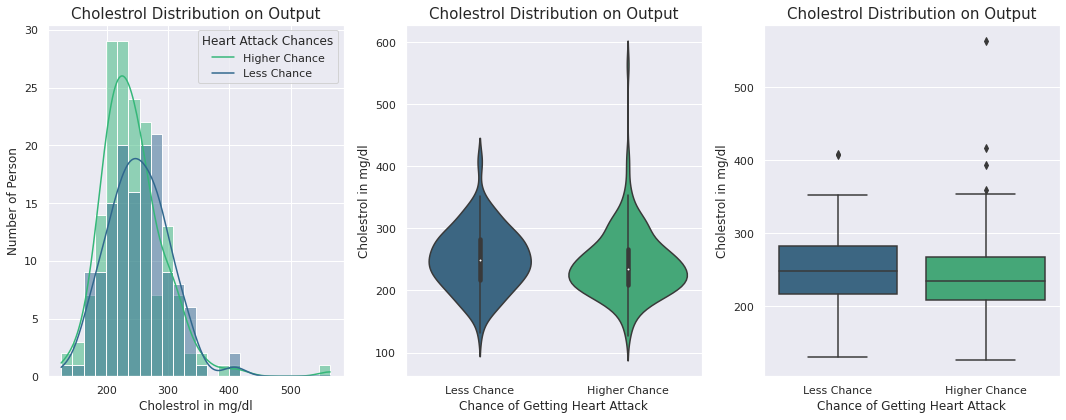

In [183]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x='chol',data=data, hue='output',
                  kde=True, palette = 'viridis', ax=ax[0])
ax[0].legend(title='Heart Attack Chances',
          labels=['Higher Chance','Less Chance'],
          loc='upper right')
ax[0].set_title('Cholestrol Distribution on Output', fontsize=15)
ax[0].set_xlabel('Cholestrol in mg/dl')
ax[0].set_ylabel('Number of Person')

sns.violinplot(x = 'output', data = data,
               y = 'chol', palette = 'viridis',
               ax=ax[1])
ax[1].set_title('Cholestrol Distribution on Output', fontsize=15)
ax[1].set_ylabel('Cholestrol in mg/dl')
ax[1].set_xlabel('Chance of Getting Heart Attack')
ax[1].set_xticklabels(['Less Chance','Higher Chance'])

sns.boxplot(x = 'output', data = data,
            y = 'chol', palette = 'viridis',
            ax = ax[2])
ax[2].set_title('Cholestrol Distribution on Output', fontsize=15)
ax[2].set_ylabel('Cholestrol in mg/dl')
ax[2].set_xlabel('Chance of Getting Heart Attack')
ax[2].set_xticklabels(['Less Chance','Higher Chance'])
plt.tight_layout()
plt.show()

> From here, we can have information as such:
- The distribution of `Chol` is mostly similar in both output. Therefore, we can't really determine (Low Relation) whether a person has higher or lower chance of getting heart attack based on given `Cholestrol` information.
- The distribution is right skewed. This is proven since there are some people that have a really high `Cholestrol`, for example (>= 500 chol) and was categorized as higher chance of getting heart attack. This kind of outliers are possible happened since there are some cases where people have a really high `Cholestrol`. 

### Fasting Blood Sugar
This variable explained as whether a person has `Fasting Blood Sugar > 120 mg/dl` or no

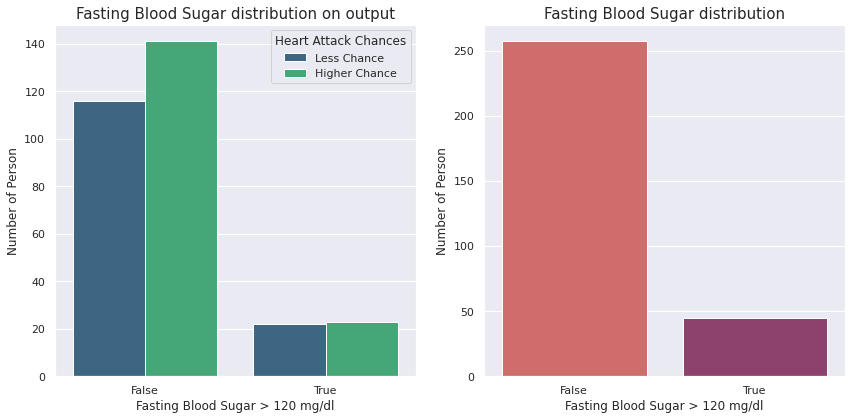

In [184]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.countplot(x='fbs', data=data, hue='output', palette='viridis', ax=ax[0])
ax[0].set_title('Fasting Blood Sugar distribution on output', fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper right')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
ax[0].set_xticklabels(['False','True'])

sns.countplot(x='fbs', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Fasting Blood Sugar distribution', fontsize=15)
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
ax[1].set_xticklabels(['False','True'])
plt.tight_layout()
plt.show()

> We can gain some information as such:
- Most people on this dataset has Fasting Blood Sugar **Less Than** 120 mg/dl.
- The distribution of people that have higher or lower chance of getting heart attack on either category has a little difference. Which means that there is a low relation between fasting blood sugar with increasing chance of getting heart attack.

### Resting Electrocardiographic Result

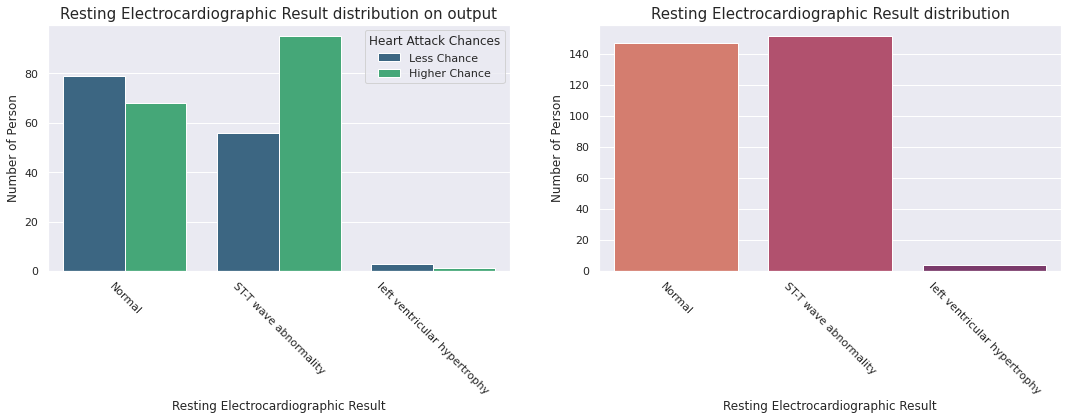

In [185]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(x='restecg', data=data, hue='output',
              palette='viridis', ax=ax[0])
ax[0].set_title('Resting Electrocardiographic Result distribution on output',
                fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper right')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Resting Electrocardiographic Result')
ax[0].set_xticklabels(['Normal','ST-T wave abnormality',
                       'left ventricular hypertrophy'],
                      rotation = -45)

sns.countplot(x='restecg', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Resting Electrocardiographic Result distribution',
                fontsize=15)
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Resting Electrocardiographic Result')
ax[1].set_xticklabels(['Normal','ST-T wave abnormality',
                       'left ventricular hypertrophy'],
                      rotation = -45)
plt.tight_layout()
plt.show()

> There are several information that we can gain here
- The data itself contains a really small percentage on a person with `left ventricular hypertrophy`, this may leads to biased analysis. Therefore, we might possibly not use this feature as our model input in future needs.
- Distribution of People with `ST-T Wave Abnormality` mostly has higher chance of getting heart attack.
- Distribution of people with `Normal` Resting Electrocardiographic Result mostly has less chance of getting heart attack.
- This variable has a low relation with the output variable.

### Maximum Heart Rate Achieved

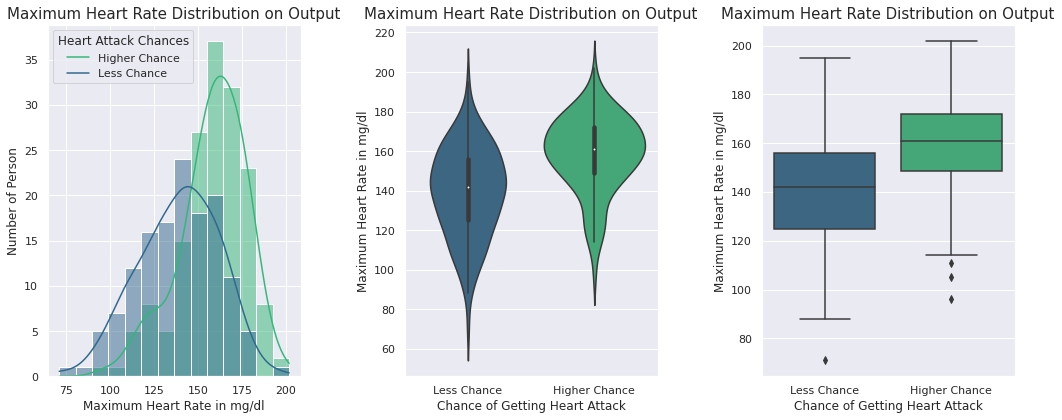

In [186]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x='thalachh',data=data, hue='output',
                  kde=True, palette = 'viridis', ax=ax[0])
ax[0].legend(title='Heart Attack Chances',
          labels=['Higher Chance','Less Chance'],
          loc='upper left')
ax[0].set_title('Maximum Heart Rate Distribution on Output', fontsize=15)
ax[0].set_xlabel('Maximum Heart Rate in mg/dl')
ax[0].set_ylabel('Number of Person')

sns.violinplot(x = 'output', data = data,
               y = 'thalachh', palette = 'viridis',
               ax=ax[1])
ax[1].set_title('Maximum Heart Rate Distribution on Output', fontsize=15)
ax[1].set_ylabel('Maximum Heart Rate in mg/dl')
ax[1].set_xlabel('Chance of Getting Heart Attack')
ax[1].set_xticklabels(['Less Chance','Higher Chance'])

sns.boxplot(x = 'output', data = data,
            y = 'thalachh', palette = 'viridis',
            ax = ax[2])
ax[2].set_title('Maximum Heart Rate Distribution on Output', fontsize=15)
ax[2].set_ylabel('Maximum Heart Rate in mg/dl')
ax[2].set_xlabel('Chance of Getting Heart Attack')
ax[2].set_xticklabels(['Less Chance','Higher Chance'])
plt.tight_layout()
plt.show()

> Let's see what do we have here. There's some interesting information that we can gain:
- Distribution of people with maximum heart rate between 150 - (~160) more likely has higher chance on getting heart attack, and distribution of people with maximum heart rate between 125 - 150 more likely has lesser chance on getting heart attack.
- This variable is rather important since we want to predict whether a person has higher or lower chance on getting heart attack, and anything related to heart rate itself is really important.

### Exercise Induced Angina

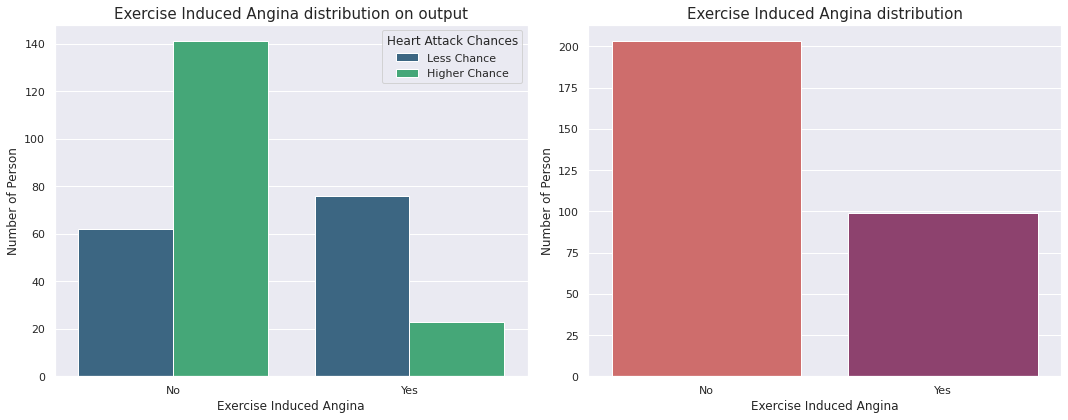

In [187]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(x='exng', data=data, hue='output',
              palette='viridis', ax=ax[0])
ax[0].set_title('Exercise Induced Angina distribution on output',
                fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper right')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Exercise Induced Angina')
ax[0].set_xticklabels(['No','Yes'])

sns.countplot(x='exng', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Exercise Induced Angina distribution',
                fontsize=15)
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Exercise Induced Angina')
ax[1].set_xticklabels(['No','Yes'])

plt.tight_layout()
plt.show()

> This variable is also rather interesting because:
- The distribution of people that have `Exercise Induced Angina` most likely has less chance on getting heart attack. On the other hand, distribution of people without `Exercise Induced Angina` has higher chance on getting heart attack. This indicates that this variable is related to whether people have higher or lower chance on getting heart attack based on whether people have `Exercise Induced Angina` or not.
- This dataset contains mostly people without `Exercise Induced Angina`

### Previous Peak

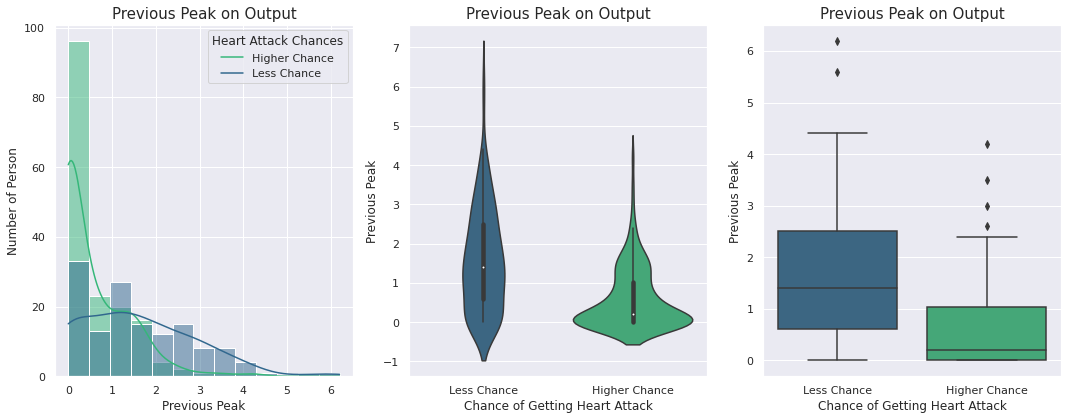

In [188]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x='oldpeak',data=data, hue='output',
                  kde=True, palette = 'viridis', ax=ax[0])
ax[0].legend(title='Heart Attack Chances',
          labels=['Higher Chance','Less Chance'],
          loc='upper right')
ax[0].set_title('Previous Peak on Output', fontsize=15)
ax[0].set_xlabel('Previous Peak')
ax[0].set_ylabel('Number of Person')

sns.violinplot(x = 'output', data = data,
               y = 'oldpeak', palette = 'viridis',
               ax=ax[1])
ax[1].set_title('Previous Peak on Output', fontsize=15)
ax[1].set_ylabel('Previous Peak')
ax[1].set_xlabel('Chance of Getting Heart Attack')
ax[1].set_xticklabels(['Less Chance','Higher Chance'])

sns.boxplot(x = 'output', data = data,
            y = 'oldpeak', palette = 'viridis',
            ax = ax[2])
ax[2].set_title('Previous Peak on Output', fontsize=15)
ax[2].set_ylabel('Previous Peak')
ax[2].set_xlabel('Chance of Getting Heart Attack')
ax[2].set_xticklabels(['Less Chance','Higher Chance'])
plt.tight_layout()
plt.show()

> As we can see here, this variable is also rather important since:
- People with `Previous Peak` between 0 to 1 is more likely has higher chance on getting heart attack. In this case, the distribution is vastly right skewed on `Higher Chance` case.
- People with `Previous Peak between 1 to 3` is more likely has lesser chance on getting heart attack.

### Slope

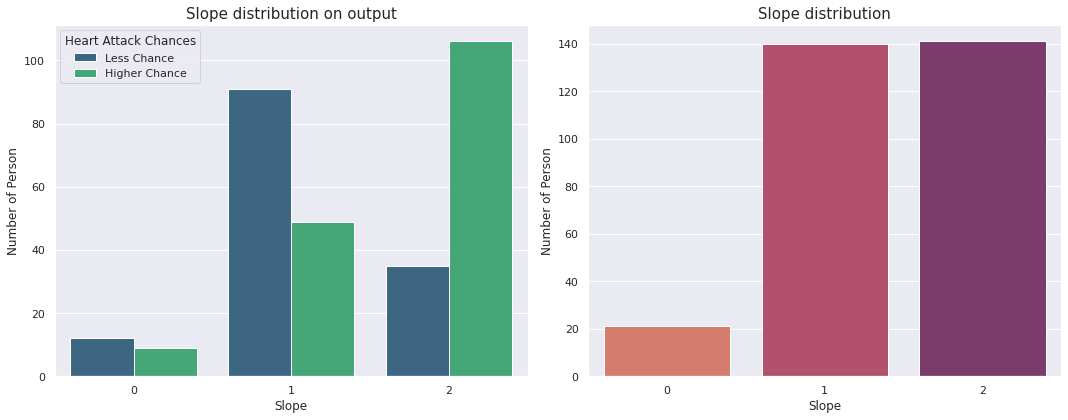

In [189]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(x='slp', data=data, hue='output',
              palette='viridis', ax=ax[0])
ax[0].set_title('Slope distribution on output',
                fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper left')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Slope')

sns.countplot(x='slp', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Slope distribution',
                fontsize=15)
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Slope')

plt.tight_layout()
plt.show()

> This variable is rather important since:
- We can clearly see that people with `Slope` of 0 or 1 more likely to have lesser chance on getting heart attack, `Slope` of 2 otherwise.
- However, the distribution of slope itself is rather imbalance, since `Slope` of 0 have a really small percentage than slope 1 and 2.
- Therefore, we might use this variable for our model

### Number of Major Vessels

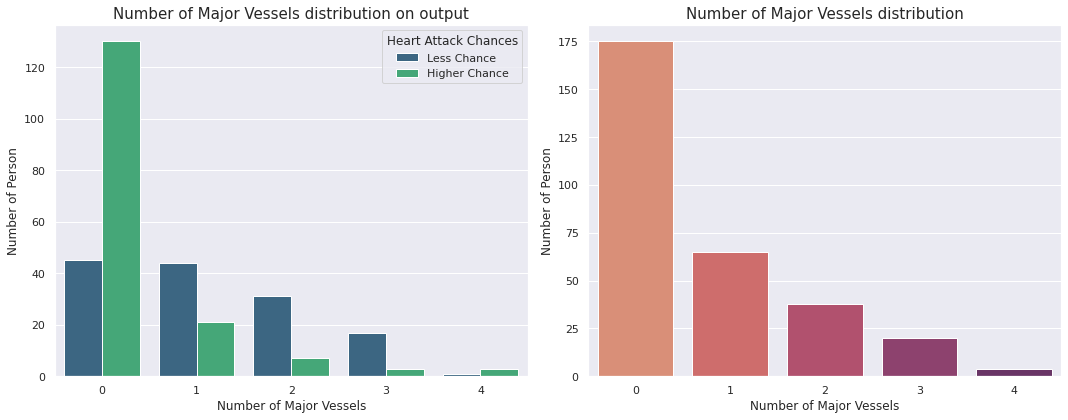

In [190]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(x='caa', data=data, hue='output',
              palette='viridis', ax=ax[0])
ax[0].set_title('Number of Major Vessels distribution on output',
                fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper right')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Number of Major Vessels')

sns.countplot(x='caa', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Number of Major Vessels distribution',
                fontsize=15)
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Number of Major Vessels')

plt.tight_layout()
plt.show()

> Let's see what do we have here:
- Distribution of people that have more than 0 major vessels (Except 4) more likely has lesser chance on getting heart attack
- Distribution of people that doesn't have major vessels or have 4 major vessels more likely have higher chance on getting heart attack.
- However, the distribution is not fairly balance, especially only small percentage of people that have 4 major vessels.
- But still, this variable is helpful and can be used for our future model.

### Thall Rate

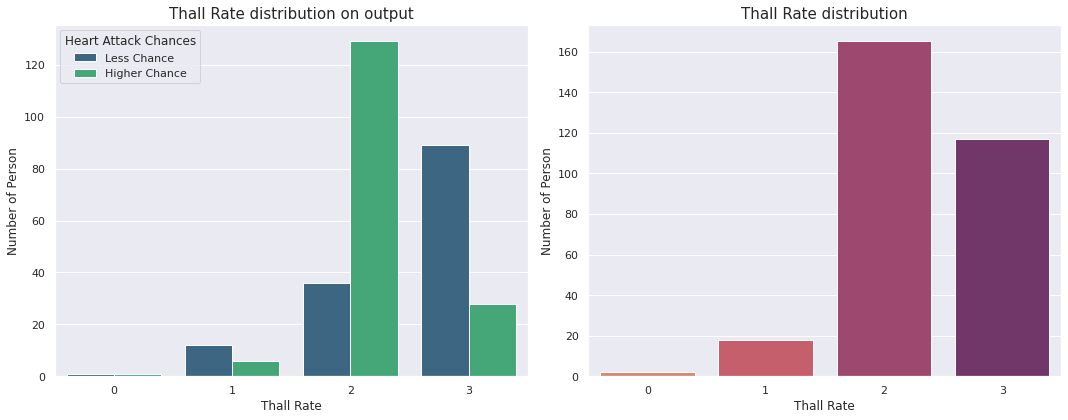

In [191]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.countplot(x='thall', data=data, hue='output',
              palette='viridis', ax=ax[0])
ax[0].set_title('Thall Rate distribution on output',
                fontsize=15)
ax[0].legend(title='Heart Attack Chances',
          labels=['Less Chance','Higher Chance'],
          loc='upper left')
ax[0].set_ylabel('Number of Person')
ax[0].set_xlabel('Thall Rate')

sns.countplot(x='thall', data=data, palette='flare', ax=ax[1])
ax[1].set_title('Thall Rate distribution',
                fontsize=15)
ax[1].set_ylabel('Number of Person')
ax[1].set_xlabel('Thall Rate')

plt.tight_layout()
plt.show()

> We can gain some information here:
- This variable is useful since we can see the distribution of people that have `Thall Rate` of 2 mostly have higher chance on getting heart attack, this was different with the rest of it.
- However, the distribution is imbalanced especially on category 0 and 1. But still, we may use this feature for our future needs.

### Correlation

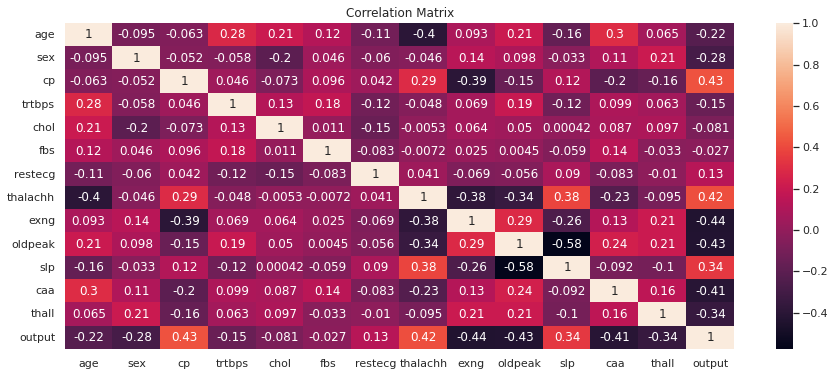

In [192]:
plt.figure(figsize=(15,6))
sns.heatmap(data=data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

> From here we can see how variable correlated within each other. But in this case, I will focus about how one correlated to `Output`. As we can see, there are some variable that have highly enough correlation with target value such as:
- cp (Chest Pain Type)
- thalachh (Maximum Heart Rate Achieved)
- exng (Exercise Induced Angina)
- oldpeak (Previous Peak)
- caa (Number of Major Vessels)
- slp (Slope)
- thall (Thall Rate)

>And some variable that can be reconsidered
- age
- sex

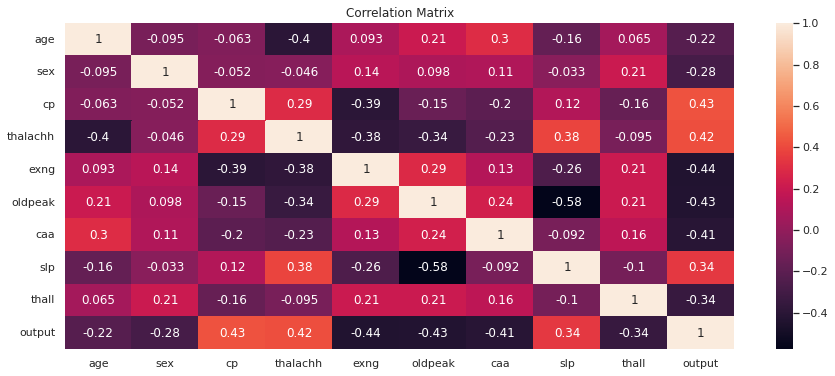

In [193]:
taken_column = ['age','sex','cp','thalachh','exng','oldpeak','caa','slp','thall','output']

data = data[taken_column]

plt.figure(figsize=(15,6))
sns.heatmap(data=data.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

## Splitting Dataset
Splitting dataset is important since we are not only train our model with full dataset, but also with test set to see how well does our model perform.

In this session, i will split the dataset with
- 80 % Development Set (80% Train, 20% Valid)
- 20% % Test Set (Unseen)

As you might see, i also will split the train dataset itself to evaluate a temporary model performance.

In [194]:
X = data.drop('output', axis=1)
y = data['output']

In [195]:
X_dev, X_test, y_dev, y_test = train_test_split(
    X, y, test_size = 0.2,
    random_state = 42,
    stratify = y
)

In [196]:
print('Development Dataset\n=======================')
print(f'X_dev shape: {X_dev.shape[0]} Rows and {X_dev.shape[1]} Columns')
print(f'y_dev shape: {y_dev.shape[0]} Rows')
print('\nUnseen Dataset\n=======================')
print(f'X_test shape: {X_test.shape[0]} Rows and {X_test.shape[1]} Columns')
print(f'y_test shape: {y_test.shape[0]} Rows')

Development Dataset
X_dev shape: 241 Rows and 9 Columns
y_dev shape: 241 Rows

Unseen Dataset
X_test shape: 61 Rows and 9 Columns
y_test shape: 61 Rows


> In this case, we won't use any of the `Unseen` dataset since this dataset will only used for future evaluation.

In [197]:
# Splitting for validation data

X_train, X_valid, y_train, y_valid = train_test_split(
    X_dev, y_dev, test_size = 0.2,
    random_state = 42,
    stratify = y_dev
)

In [198]:
print('Train Dataset\n=======================')
print(f'X_train shape: {X_train.shape[0]} Rows and {X_train.shape[1]} Columns')
print(f'y_train shape: {y_train.shape[0]} Rows')
print('\Validation Dataset\n=======================')
print(f'X_valid shape: {X_valid.shape[0]} Rows and {X_valid.shape[1]} Columns')
print(f'y_valid shape: {y_valid.shape[0]} Rows')

Train Dataset
X_train shape: 192 Rows and 9 Columns
y_train shape: 192 Rows
\Validation Dataset
X_valid shape: 49 Rows and 9 Columns
y_valid shape: 49 Rows


> Now we're good to go

## Preprocessing

### Feature Selection
Feature Selection is useful since it can improve our model performance. In this case we will perform statistical testing by utilizing correlation.

In [199]:
# Divide Numerical and Categorical Input
numerical_feature = X_train[['age','thalachh','oldpeak']] 
categorical_feature = X_train[['sex','cp','exng','caa','slp']]

#### ANOVA testing for numerical input

In [200]:
fs = SelectKBest(score_func = f_classif, k = 3)
numerical_selected_features = fs.fit(numerical_feature, y_train)

In [201]:
num_df = pd.DataFrame({
    'Numerical Feature': numerical_feature.columns.to_list(),
    'Score (F-statistic)': numerical_selected_features.scores_,
    'P-Value': [float(pval) for pval in numerical_selected_features.pvalues_],
    'P-Val < 0.5 (Significance)': [True for pval in
                                   numerical_selected_features.pvalues_
                                   if pval < 0.5]
})

In [202]:
num_df

,Numerical Feature,Score (F-statistic),P-Value,P-Val < 0.5 (Significance)
0,age,9.121753,2.873293e-03,True
1,thalachh,40.328131,1.544945e-09,True
2,oldpeak,44.057680,3.245598e-10,True


> For numerical feature, we can see that all three features are significance, but `Age` seems to have low correlation, therefore we will remove it.

#### Chi-Squared testing for categorical input

In [203]:
fs_chi = SelectKBest(score_func=chi2, k='all')
categorical_selected_features = fs_chi.fit(categorical_feature, y_train)

In [204]:
cat_df = pd.DataFrame({
    'Categorical Feature': categorical_feature.columns.to_list(),
    'Score (F-statistic)': categorical_selected_features.scores_,
    'P-Value': [float(pval) for pval in categorical_selected_features.pvalues_],
    'P-Val < 0.5 (Significance)': [True for pval in
                                   categorical_selected_features.pvalues_
                                   if pval < 0.5]
})
cat_df

,Categorical Feature,Score (F-statistic),P-Value,P-Val < 0.5 (Significance)
0,sex,4.041958,4.438230e-02,True
1,cp,44.313287,2.798106e-11,True
2,exng,26.881119,2.163623e-07,True
3,caa,38.546322,5.346943e-10,True
4,slp,7.835925,5.121793e-03,True


> For numerical feature, we can take `cp, exng, caa` since they have a high correlation to our target, and since it's also significance, then we're good to go.

In [205]:
features = ['thalachh','oldpeak','cp','exng','caa']

# For Train Dataset
X_train = X_train[features]

# For Validation Dataset
X_valid = X_valid[features]

# For Unseen Dataset
X_test = X_test[features]

# For Full Development Dataset
X_dev = X_dev[features]

### Categorical Encoding

We also have some categorical variable that have more than 2 categories. In this case, we will utilize `One Hot Encoding` to our dataset. `One Hot Encoding` works by for example, we have category of `0,1,2`, the OHE itself will create 3 columns and assign `1` if the category exists in the current row.

But for `exng`, since its only contain 2 categories (binary), then we won't perform any OHE.

In [206]:
cols_ohe = ['cp','caa']

# Apply one-hot encoder to each column with categorical data
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE_cols_train = pd.DataFrame(OHE.fit_transform(X_train[cols_ohe]))
OHE_cols_valid = pd.DataFrame(OHE.transform(X_valid[cols_ohe]))
OHE_cols_unseen = pd.DataFrame(OHE.transform(X_test[cols_ohe]))
OHE_cols_dev = pd.DataFrame(OHE.fit_transform(X_dev[cols_ohe]))

# One-hot encoding removed index; put it back
OHE_cols_train.index = X_train.index
OHE_cols_valid.index = X_valid.index
OHE_cols_unseen.index = X_test.index
OHE_cols_dev.index = X_dev.index

# Keeping column name
OHE_cols_train.columns = OHE.get_feature_names_out()
OHE_cols_valid.columns = OHE.get_feature_names_out()
OHE_cols_unseen.columns = OHE.get_feature_names_out()
OHE_cols_dev.columns = OHE.get_feature_names_out()

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(cols_ohe, axis=1)
num_X_valid = X_valid.drop(cols_ohe, axis=1)
num_X_test = X_test.drop(cols_ohe, axis=1)
num_X_dev = X_dev.drop(cols_ohe, axis=1)

# Add one-hot encoded columns to numerical features
X_train = pd.concat([num_X_train, OHE_cols_train], axis=1)
X_valid = pd.concat([num_X_valid, OHE_cols_valid], axis=1)
X_test = pd.concat([num_X_test, OHE_cols_unseen], axis=1)
X_dev = pd.concat([num_X_dev, OHE_cols_dev], axis=1)

### Feature Scaling
In this dataset, we can see that there are several columns that has different range of value. This range can be a problem since it can gives more weight to our model. Therefore we will use Scaling called `MinMaxScaler` for our `Normalization` process.

In [207]:
scaler = MinMaxScaler()

# Scaling on Training Dataset
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    index = X_train.index,
    columns = X_train.columns)

# Scaling on Validation Dataset
X_valid_scaled = pd.DataFrame(
    scaler.transform(X_valid),
    index = X_valid.index,
    columns = X_valid.columns)

# Scaling on Unseen Dataset
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    index = X_test.index,
    columns = X_test.columns)

# Scaling on Development Dataset
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev),
    index = X_dev.index,
    columns = X_dev.columns)

Now, there's some question. `Why only train being fitted and not the rest of it?`
Well, to answer this question, I will divide 2 explanation:
- Short Answer
>We want to train the scaler ONLY on training data, and the rest (valid, and test) is to evaluate the performance based on training scaler

- Long Answer
>Imagine we have a range of value between 0 to 6 in our training, which means that if we "Train" the scale with this scalation, than that's it, that's how our scaler works. Even if the test dataset contains range of value between 0 to 10, then our scaler will try to adapt to the data.
This all basically prevent us from leaking data. If we also perform fitting on the test dataset, it means that our scaler can't adapt enough to our dataset, and will lead to bias performance.

## Modelling
Now, here's the step where we are all waiting for. We will play around some Machine Learning Models to use our dataset for predictive results.

Let me explain about the process itself
1. We need to define baseline model, baseline model is important since it could be our `threshold` to see the least expected performance resulted from our model
2. To Evaluate the performance, we will use `Cross Validation Score`. But, what is `Cross Validation`?. Cross Validation is a way for us to evaluate our model by utilizing fully dataset. if we just simply split, it means that the test set was static and can lead to bias (maybe this model good for that list of test set)
Heres basically what i meant.

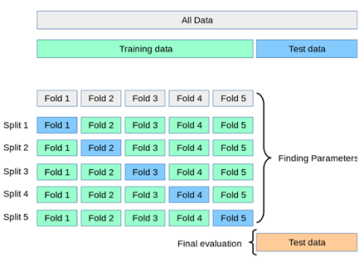

### Baseline Model
For baseline model, we will use a simple ML model. In this case, I will use `Logistic Regression`

In [208]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [209]:
lr_pred = lr_model.predict(X_valid_scaled)

#### Confusion Matrix

In [210]:
TRUTH_VALUE = y_valid

In [211]:
def plot_conf_matrix(TRUTH_VALUE, pred, model_name):
  cf = confusion_matrix(TRUTH_VALUE, pred)
  ax = sns.heatmap(cf, annot=True, linewidth=0.1)

  ax.set_title('Confusion Matrix of '+model_name)
  ax.set_xlabel('Prediction Values')
  ax.set_ylabel('Actual Values')

  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  plt.show()

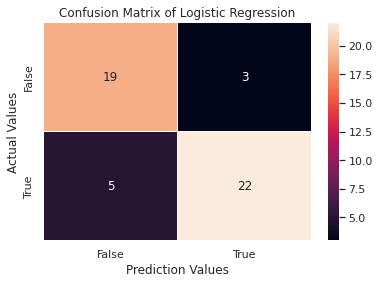

In [212]:
plot_conf_matrix(TRUTH_VALUE, lr_pred, 'Logistic Regression')

In [213]:
print(f'\nClassification Score:\n {classification_report(TRUTH_VALUE, lr_pred)}')


Classification Score:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.88      0.81      0.85        27

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



> Here we know that the F1-Score (accuracy micro average) is 84%, which is good enough for baseline model

In [214]:
def plot_roc(model, TRUTH_VALUE, model_name):
  pred_proba = model.predict_proba(X_valid_scaled)[::,1]
  fpr,tpr,threshold = roc_curve(TRUTH_VALUE, pred_proba)

  plt.plot(fpr, tpr, 
           label='AUC = '+str(roc_auc_score(TRUTH_VALUE, pred_proba)))
  plt.plot([0,1], ls='--')
  plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve for '+model_name)
  plt.legend(loc='lower right')
  plt.show()

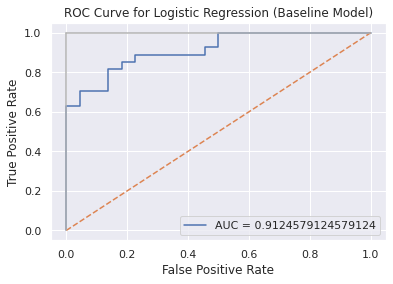

In [215]:
plot_roc(lr_model, TRUTH_VALUE, 'Logistic Regression (Baseline Model)')

> Here we have some visualization about `ROC Curve`, ROC stands for `Receiver Operating Charasteristic`. This curve can be obtained by utilizing `predict_proba` which instead of displaying 0 or 1 value on target, this proba will predict the `probability` of the predicted value that could be 0.1 etc.
- As a quick look, the bigger the area under the roc curve (the more the line getting to the top left) the better, as we can see, our model is performing well enough.
- As for AUC score (Area under the curve), it is a score for our ROC curve. Which means, the closer to 1, the better.

#### Cross Validation Score
Cross validation works by iterating through our dataset so that the training data will be different, and we will take the average score from all the total score. In this case, we won't use X_train, but a X_dev (full development dataset) since this process will iterate through all data to split train and the validation dataset

In [216]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
score = cross_val_score(lr_model, X_dev_scaled, y_dev, cv=cv)
print(f'Cross Validation Score: {score.mean()}')

Cross Validation Score: 0.8122448979591838


> We get about 81.2% Cross Validation Score, which means this model is generally good enough for our baseline model.

### Modelling
There are plenty of Machine Learning Classifier. In this case, I will use 6 of them such as:
- Naive Bayes
- K-Nearest Neighbor
- Support Vector Machine
- Random Forest
- XGBoost
- Catboost

In [217]:
# Define the models used
models = [
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(random_state=42, probability=True),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=False)
]
models_name = [
    'Gaussian Naive Bayes',
    'KNN Classifier',
    'Support Vector Classifier',
    'Random Forest Classifier',
    'XGBoost Classifier',
    'CatBoost Classifier'
]

In [218]:
def model_score(model, model_name):
  model = model
  model.fit(X_train_scaled, y_train)
  pred = model.predict(X_valid_scaled)

  print('=====================================')
  print(model_name)
  print('=====================================')

  # Cross Val Score
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
  score = cross_val_score(model, X_dev_scaled, y_dev, cv=cv)
  print(f'Cross Validation Score ({model_name}): {score.mean()}')

  # Classification Report
  print(f'\nClassification Score:\n {classification_report(TRUTH_VALUE, pred)}')

  # Confusion Matrix
  plot_conf_matrix(TRUTH_VALUE, pred, model_name)

  # ROC Curve
  plot_roc(model, TRUTH_VALUE, model_name)
  print('=====================================')
  print('\n')


Gaussian Naive Bayes
Cross Validation Score (Gaussian Naive Bayes): 0.7714285714285715

Classification Score:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.88      0.78      0.82        27

    accuracy                           0.82        49
   macro avg       0.82      0.82      0.82        49
weighted avg       0.82      0.82      0.82        49



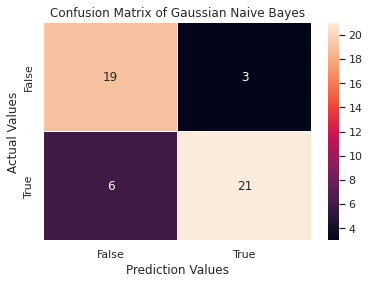

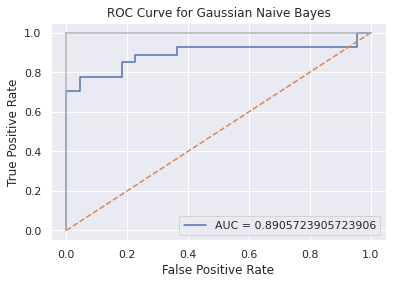



KNN Classifier
Cross Validation Score (KNN Classifier): 0.8204081632653061

Classification Score:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.83      0.70      0.76        27

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.76        49
weighted avg       0.77      0.76      0.76        49



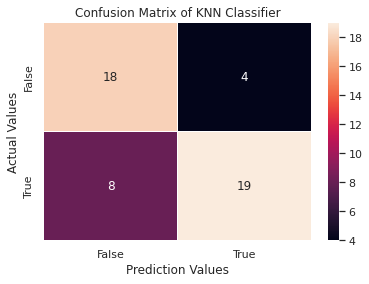

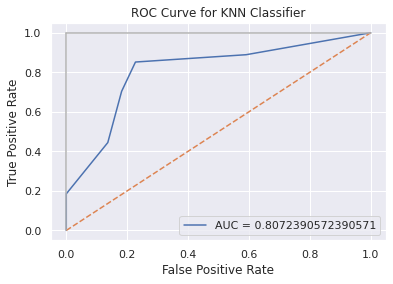



Support Vector Classifier
Cross Validation Score (Support Vector Classifier): 0.8081632653061224

Classification Score:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.84      0.78      0.81        27

    accuracy                           0.80        49
   macro avg       0.79      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



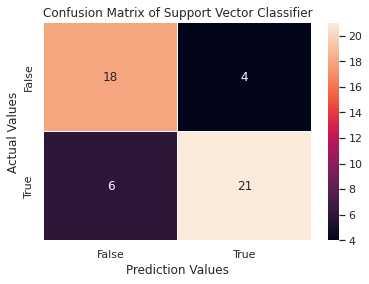

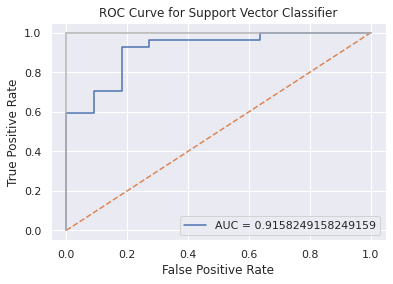



Random Forest Classifier
Cross Validation Score (Random Forest Classifier): 0.763265306122449

Classification Score:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.83      0.74      0.78        27

    accuracy                           0.78        49
   macro avg       0.78      0.78      0.78        49
weighted avg       0.78      0.78      0.78        49



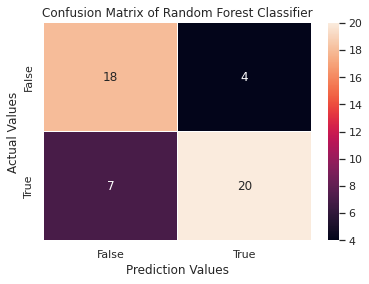

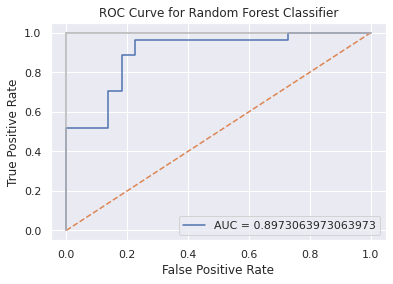



XGBoost Classifier
Cross Validation Score (XGBoost Classifier): 0.7551020408163265

Classification Score:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.83      0.70      0.76        27

    accuracy                           0.76        49
   macro avg       0.76      0.76      0.76        49
weighted avg       0.77      0.76      0.76        49



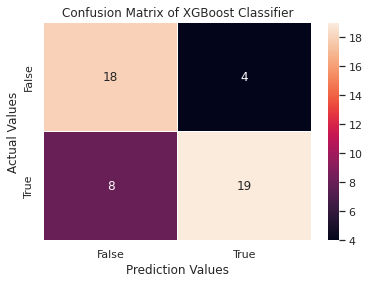

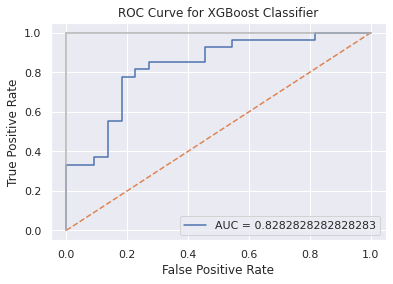



CatBoost Classifier
Cross Validation Score (CatBoost Classifier): 0.7959183673469388

Classification Score:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.84      0.78      0.81        27

    accuracy                           0.80        49
   macro avg       0.79      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



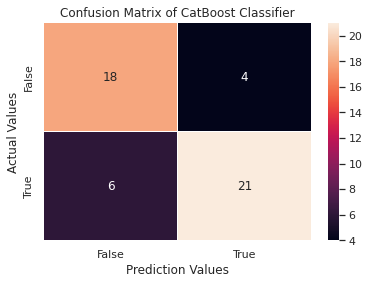

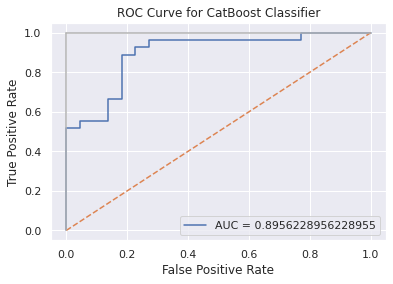

In [219]:
for model, name in zip(models, models_name):
  model_score(model, name)

> Seems Like Our Logistic Regression Performs better than 6 of this model. Logistic Regression can perform better since our dataset is small (~300 data), that's why simple model could perform better. Now let's perform `Hyperparameter Tuning` to see if our model can even perform better.

### Modelling (Hyperparameter Tuning)
Hyperparameter tuning works by utilizing `Hyperparameter` of model so that it could improve our model. By tuning, it means that we want to find the best hyperparameter for our model

In [220]:
models = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(random_state=42, probability=True),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=False)
]
models_name = [
    'Logistic Regression',
    'Gaussian Naive Bayes',
    'KNN Classifier',
    'Support Vector Classifier',
    'Random Forest Classifier',
    'XGBoost Classifier',
    'CatBoost Classifier'
]

In [221]:
# Defining Parameters
params = [
    {# Logistic Regression
        'penalty': ['l2','none'],
        'C': [100, 10, 1, 0.1, 0.01]
    },
    {# Gaussian Naive Bayes
        'var_smoothing': np.logspace(0, -9, num=100)
    },
    {# KNN Classifier
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2]
    },
    {# Support Vector Classifier
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    },
    {# Random Forest Classifier
        'max_depth': [i for i in range(10,110,10)],
        'min_samples_leaf': [1, 2, 4, 8],
        'min_samples_split': [2, 5, 8, 10],
        'n_estimators': [i for i in range(20, 130, 20)],
        'criterion': ['gini','entropy'],
        'max_features': ['sqrt','log2'],
        'bootstrap': [True, False]
    },
    {# XGBoost Classifier
        'colsample_bytree': [0.3, 0.5, 0.8],
        'reg_alpha': [0, 0.5, 1, 5],
        'reg_lambda': [0, 0.5, 1, 5],
        'min_child_weight': [1, 5, 10, 15, 20, 25],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'tree_method': ['auto', 'exact', 'approx', 'hist'],
        'eta': [float(x) for x in np.linspace(0, 1, num = 10)],
        'lambda': [float(x) for x in np.linspace(0,1, num=5)],
        'alpha': [float(x) for x in np.linspace(0,1, num=5)]
    },
    {# CatBoost Classifier
        'max_depth': [i for i in range(1,6)],
        'n_estimators': [i for i in range(100, 501, 100)]
    }
]

In [222]:
def model_score_hyper_tune(model, model_name, params, n_iter=10):
  rscv = RandomizedSearchCV(model, params, cv = 3,
                            n_jobs = -1, verbose=0,
                            n_iter = n_iter,
                            random_state = 42)
  rscv.fit(X_train_scaled, y_train)
  pred = rscv.predict(X_valid_scaled)

  print('=====================================')
  print(model_name)
  print('=====================================')

  # Cross Val Score
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
  score = cross_val_score(rscv, X_dev_scaled, y_dev, cv=cv)
  print(f'Cross Validation Score ({model_name}): {score.mean()}')

  # Best Parameter
  print('Best Parameters')
  print(rscv.best_params_)

  # Classification Report
  print(f'\nClassification Score:\n {classification_report(TRUTH_VALUE, pred)}')

  # Confusion Matrix
  plot_conf_matrix(TRUTH_VALUE, pred, model_name)

  # ROC Curve
  plot_roc(rscv, TRUTH_VALUE, model_name)
  print('=====================================')
  print('\n')

Logistic Regression
Cross Validation Score (Logistic Regression): 0.8285714285714285
Best Parameters
{'penalty': 'l2', 'C': 1}

Classification Score:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.88      0.81      0.85        27

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



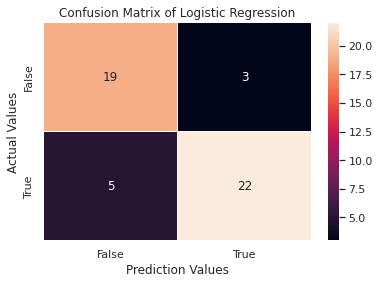

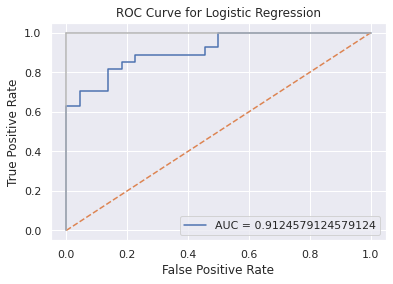



Gaussian Naive Bayes
Cross Validation Score (Gaussian Naive Bayes): 0.8326530612244898
Best Parameters
{'var_smoothing': 1.0}

Classification Score:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.85      0.85      0.85        27

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



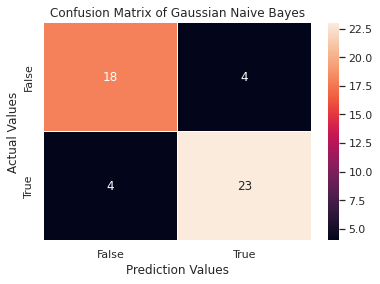

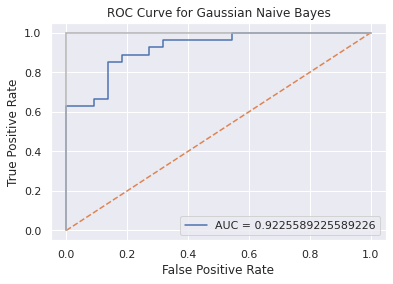



KNN Classifier
Cross Validation Score (KNN Classifier): 0.8122448979591838
Best Parameters
{'p': 1, 'n_neighbors': 8, 'leaf_size': 29}

Classification Score:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.84      0.78      0.81        27

    accuracy                           0.80        49
   macro avg       0.79      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



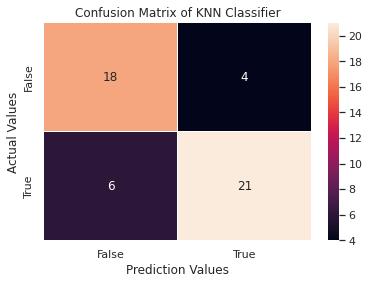

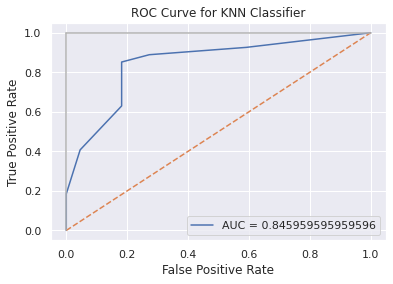



Support Vector Classifier
Cross Validation Score (Support Vector Classifier): 0.8163265306122449
Best Parameters
{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}

Classification Score:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.84      0.78      0.81        27

    accuracy                           0.80        49
   macro avg       0.79      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



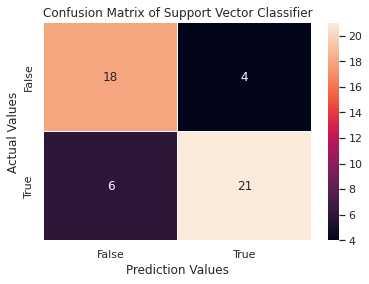

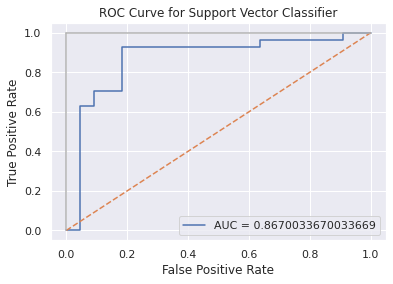



Random Forest Classifier
Cross Validation Score (Random Forest Classifier): 0.7673469387755102
Best Parameters
{'n_estimators': 60, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}

Classification Score:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.88      0.81      0.85        27

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



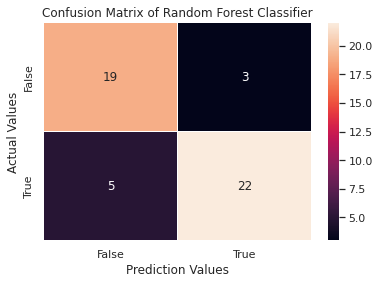

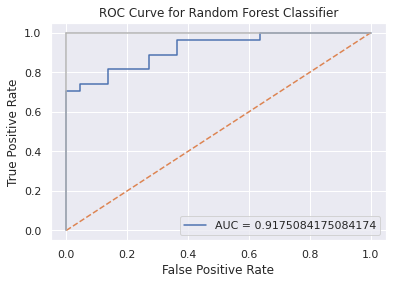



XGBoost Classifier
Cross Validation Score (XGBoost Classifier): 0.8163265306122449
Best Parameters
{'tree_method': 'approx', 'reg_lambda': 5, 'reg_alpha': 0, 'min_child_weight': 10, 'lambda': 0.75, 'gamma': 0.1, 'eta': 0.7777777777777777, 'colsample_bytree': 0.8, 'alpha': 1.0}

Classification Score:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.83      0.74      0.78        27

    accuracy                           0.78        49
   macro avg       0.78      0.78      0.78        49
weighted avg       0.78      0.78      0.78        49



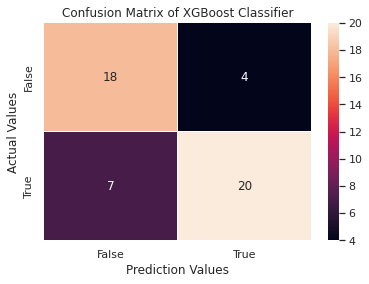

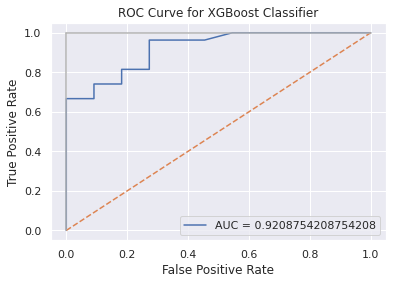



CatBoost Classifier
Cross Validation Score (CatBoost Classifier): 0.7755102040816327
Best Parameters
{'n_estimators': 200, 'max_depth': 1}

Classification Score:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.78      0.78      0.78        27

    accuracy                           0.76        49
   macro avg       0.75      0.75      0.75        49
weighted avg       0.76      0.76      0.76        49



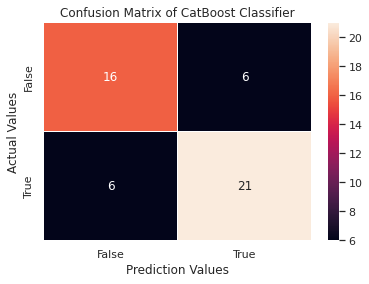

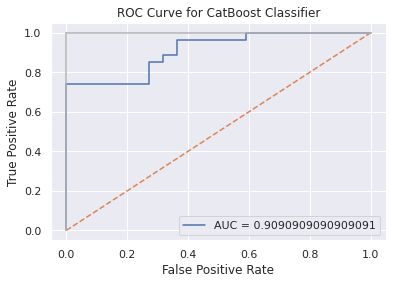

In [223]:
for i in range(len(models)):
  model_score_hyper_tune(models[i], models_name[i], params[i], n_iter=10)

> As we can see, `Gaussian Naive Bayes` performs better among all, first from the good `roc-auc score`, followed by `Cross Validation` score. Therefore, we will choose this model with `best parameter` for sure as our best model.

### Best Model

In [224]:
parameters = {
    'var_smoothing': 1.0
}
best_model = GaussianNB(**parameters)
best_model.fit(X_train_scaled, y_train)

GaussianNB(var_smoothing=1.0)

### Feature Importance
After we train our model, it would be helpful if we know which feature affects the most to our model. To find out which one, we can utilize `feature_importances_`

In [228]:
shap_values = shap.KernelExplainer(best_model.predict, X_valid_scaled).shap_values(X_valid_scaled)

X does not have valid feature names, but GaussianNB was fitted with feature names


  0%|          | 0/49 [00:00<?, ?it/s]

X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have valid feature names, but GaussianNB was fitted with feature names
X does not have 

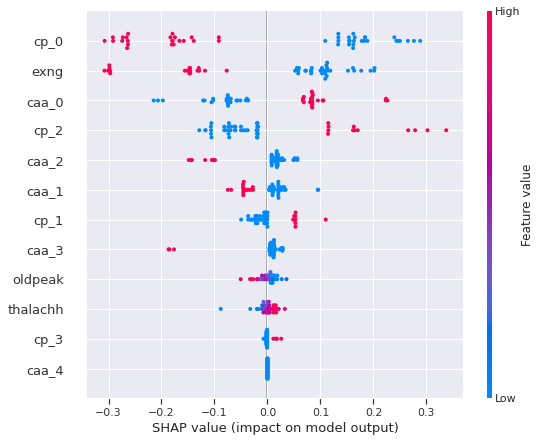

In [229]:
shap.summary_plot(shap_values, X_valid_scaled)

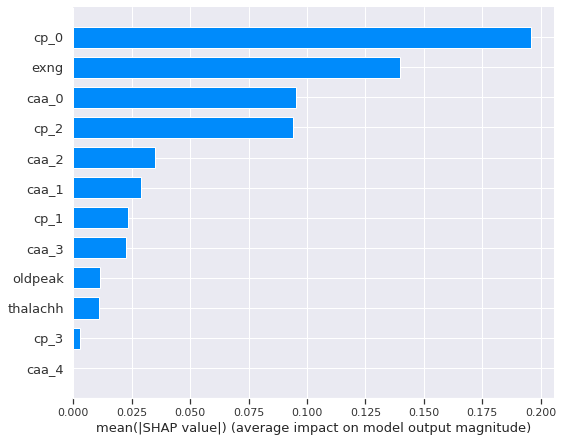

In [231]:
shap.summary_plot(shap_values, X_valid_scaled, plot_type='bar')

From here, we can see some features that affects our model output. As we can see, `cp_3` and `caa_4` which basically a category part from `Chest Pain Type 3` and `Number of Major Vessels of 4`. Actually if we remove those, we won't have much problem, instead we can help our model from preventing `Dummy Variable Trap`.
**Dummy Variable Trap** is a kind of trap that often happens in One Hot Encoding process, where for example, if we knew that we have 4 category, the OHE process will divide it to `var_1, var_2, var_3, var_4`. If we remove one of those, then basically it means to remove things that we know that the only result. for example if we have var 3 = 1, which means the dataset will be:

| var_1 | var_2 | var_3 | var_4 |
|-------|-------|-------|-------|
|0|0|1|0|

If, we remove `var_3`, that it should be resulted as 

| var_1 | var_2 | var_4 |
|-------|-------|-------|
|0|0|0|

Since all value are 0, that means that the selected category is `var_3`. So, we have 2 advantage
1. Feature reduction, which means faster computation
2. Preventing Dummy Variable Trap

**BUT**, even though it seems okay to remove these, we know that this category is mostly imbalanced, perhaps it would be *Dangerous* just removing these feature, since it would remove those *information* completely and our model might not even recognize category of that low values. Therefore, we will keep all of these features.

References to learn more about Dummy Variable Trap:
[Dummy Variable Trap](https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/)

Gaussian Naive Bayes
Cross Validation Score (Gaussian Naive Bayes): 0.8244897959183672

Classification Score:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.85      0.85      0.85        27

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



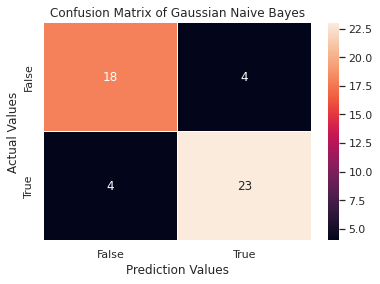

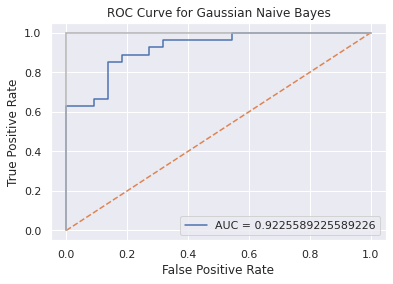

In [247]:
model_score(best_model, 'Gaussian Naive Bayes')

## Evaluate Model with Unseen Dataset
We have complete the process, creating model, and finally we will take a look at the `unseen dataset` that we have prepared before. Let's see whether our model well generalized or not.

Gaussian Naive bayes

Classification Score:
               precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



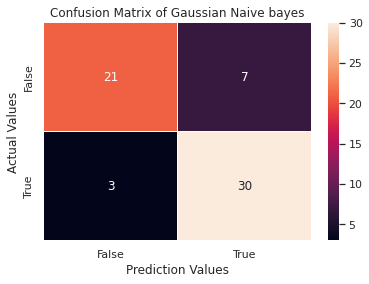

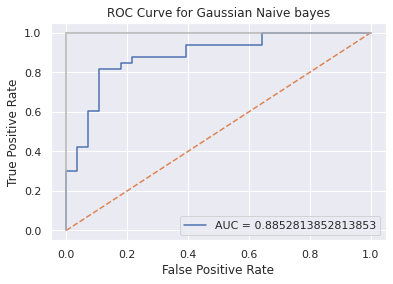

In [250]:
unseen_pred = best_model.predict(X_test_scaled)
model_name = 'Gaussian Naive bayes'
print('=====================================')
print(model_name)
print('=====================================')

# Classification Report
print(f'\nClassification Score:\n {classification_report(y_test, unseen_pred)}')

# Confusion Matrix
plot_conf_matrix(y_test, unseen_pred, model_name)

# ROC Curve
pred_proba_unseen = model.predict_proba(X_test_scaled)[::,1]
fpr,tpr,threshold = roc_curve(y_test, pred_proba_unseen)

plt.plot(fpr, tpr, 
           label='AUC = '+str(roc_auc_score(y_test, pred_proba_unseen)))
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for '+model_name)
plt.legend(loc='lower right')
plt.show()
print('=====================================')
print('\n')

> As we can see, the model still produce a good f1-score = `84%` with AUC score of 88.52%, which means, our model not overfitting, nor underfitting (Generalized enough) for this dataset.

## Conclusion
After going through a lot of process like
- Data Understanding
- Exploratory Data Analysis
- Preprocessing
- Modelling
- Evaluation

We can find out that our best model for this dataset is `Gaussian Naive Bayes` tuned with `hyperparameter tuning` with `F1-Score of 84%` on Unseen dataset.

The problem here is, our dataset is very small (~300) which means that our model can't perform as good as we want (> 90%). There might be another step especially in feature selection to achieve higher score.

But to keep in mind, `Machine Learning Process` is not all about score, *well higher score is better tho*, **BUT** if we want to understand the `objective`, we might as well to keep the input feature that important too (Don't just remove it wihout reasoning).